In [21]:
import time; start = time.time()
#Uploading files to Google Colab - training data and test data
# from google.colab import files
# uploaded = files.upload()

In [22]:
#reading uploaded file
import pandas as pd
import io
data = pd.read_csv('../stars_train.csv')
# data = pd.read_csv(io.BytesIO(uploaded['stars_train.csv']))
data.head()

,Temperature,L,R,A_M,Color,Spectral_Class,Type
0,3484,0.000551,0.0998,16.67,Red,M,0
1,23000,127000.000000,36.0000,-5.76,Blue,O,4
2,4287,630000.000000,1315.0000,-9.20,Orange,K,5
3,3462,0.005300,0.1480,11.47,Red,M,1
4,36108,198000.000000,10.2000,-4.40,Blue,O,3


In [23]:
#extracting predictors and responses using iloc
x = data.iloc[:, [0, 3]]
y = data.iloc[:, 6]

#split into train/test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

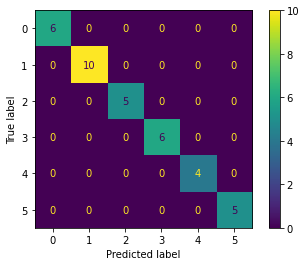

In [24]:
#model fitting
from sklearn.tree import DecisionTreeClassifier

tree3 = DecisionTreeClassifier()
tree3.fit(x_train, y_train)

#confusion matrix plotting with test set of training data

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

predictions = tree3.predict(x_test)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [25]:
#reading final test data and extracting predictors/responses
testdata = pd.read_csv('../stars_competitor_test.csv')
finalfeatures = testdata
finalfeatures = testdata.iloc[:, [1, 4]]

#making predictions on test data and downloading
finalpredictions = tree3.predict(finalfeatures)
df = pd.DataFrame(finalpredictions, columns = ["Predicted"])
df.to_csv('Li_Zachary_Fall21.csv')
# files.download('Li_Zachary_Fall21.csv')
end = time.time()
print(end - start)

0.3648364543914795
